# Data Quality Assesment

## Imports

In [1]:
# Dataimport
import pyarrow.parquet as pq

# Dataanalysis
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# time
import time
import datetime

## Load Data

In [2]:
measurement_data = pq.read_table('C:/Users/jonas.hodel/Downloads/child-mind-institute-detect-sleep-states/train_series.parquet')
measurement_df = measurement_data.to_pandas()

del measurement_data

events_df = pd.read_csv('C:/Users/jonas.hodel/Downloads/child-mind-institute-detect-sleep-states/train_events.csv')

## Analyse the measurement data

### First rows of the data

In [3]:
measurement_df.head()

,series_id,step,timestamp,anglez,enmo
0,038441c925bb,0,2018-08-14T15:30:00-0400,2.6367,0.0217
1,038441c925bb,1,2018-08-14T15:30:05-0400,2.6368,0.0215
2,038441c925bb,2,2018-08-14T15:30:10-0400,2.6370,0.0216
3,038441c925bb,3,2018-08-14T15:30:15-0400,2.6368,0.0213
4,038441c925bb,4,2018-08-14T15:30:20-0400,2.6368,0.0215


### Check data types

In [9]:
measurement_df.dtypes

series_id     object
step           int32
timestamp     object
anglez       float32
enmo         float32
dtype: object

In [5]:
measurement_df["step"]  = measurement_df["step"].astype("int")

### Check basic statistics for numeric columns

In [11]:
measurement_df.describe()

,step,anglez,enmo
count,1.279463e+08,1.279463e+08,1.279463e+08
mean,2.548048e+05,-8.810453e+00,4.131503e-02
std,1.778930e+05,3.552188e+01,1.018289e-01
min,0.000000e+00,-9.000000e+01,0.000000e+00
25%,1.158120e+05,-3.185890e+01,1.300000e-03
50%,2.345190e+05,-9.597900e+00,1.720000e-02
75%,3.571960e+05,1.130020e+01,4.370000e-02
max,1.433879e+06,9.000000e+01,1.143370e+01


### Check for null values in data

In [12]:
measurement_df.isnull().sum()

series_id    0
step         0
timestamp    0
anglez       0
enmo         0
dtype: int64

No records with null values found. As a result no further actions needs to be taken.

### Check for duplicates

In [13]:
len(measurement_df[measurement_df.duplicated()])

0

No duplicate records found. As a result no further actions needs to be taken.

### Amount of series

In [14]:
len(measurement_df['series_id'].unique())

277

### Lengthdistribution of series

series_id
038441c925bb     (300000, 400000]
03d92c9f6f8a     (700000, 800000]
0402a003dae9     (300000, 400000]
04f547b8017d     (600000, 700000]
05e1944c3818     (400000, 500000]
                      ...        
fa149c3c4bde     (400000, 500000]
fb223ed2278c    (900000, 1000000]
fbf33b1a2c10     (400000, 500000]
fcca183903b7     (600000, 700000]
fe90110788d2     (500000, 600000]
Name: step, Length: 277, dtype: category
Categories (17, interval[int64, right]): [(0, 100000] < (100000, 200000] < (200000, 300000] < (300000, 400000] ... (1300000, 1400000] < (1400000, 1500000] < (1500000, 1600000] < (1600000, 1700000]]

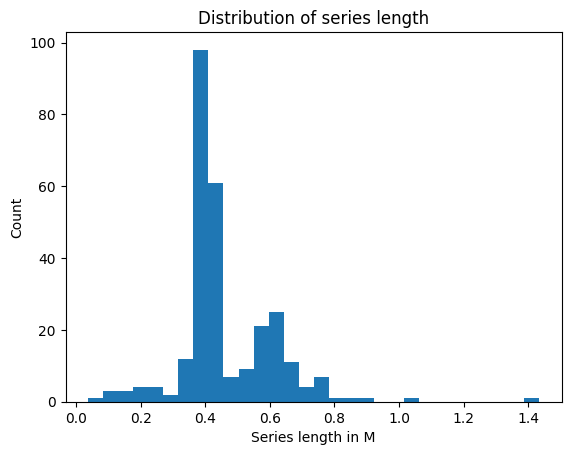

In [30]:
step_plot_data = measurement_df.groupby('series_id').count()['step'] / 1000000

step_plot_data.hist(bins=30)
plt.xlabel('Series length in M')
plt.grid(False)
plt.ylabel('Count')
plt.title('Distribution of series length')
plt.show()

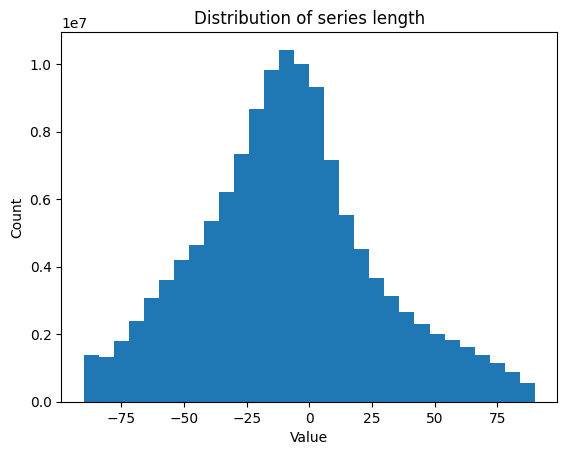

In [32]:
anglez_plot_data = measurement_df['anglez']

anglez_plot_data.hist(bins=30)
plt.xlabel('Value')
plt.grid(False)
plt.ylabel('Count')
plt.title('Distribution of series length')
plt.show()

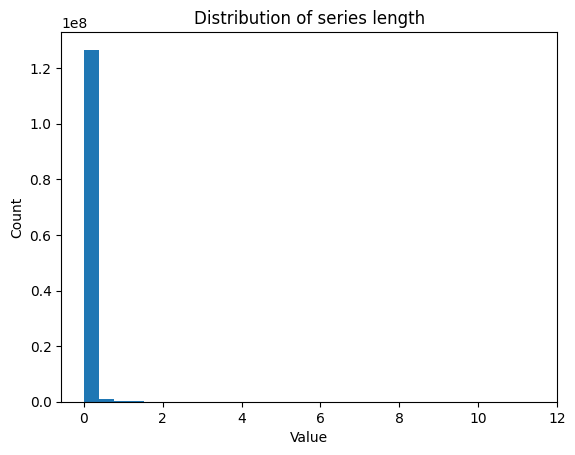

In [33]:
anglez_plot_data = measurement_df['enmo']

anglez_plot_data.hist(bins=30)
plt.xlabel('Value')
plt.grid(False)
plt.ylabel('Count')
plt.title('Distribution of series length')
plt.show()

In [41]:
measurement_df[measurement_df['enmo'] > 1]['enmo']

881          1.1848
882          1.1286
883          1.0932
931          1.2233
4478         1.0952
              ...  
127944275    1.0183
127944673    1.3622
127944776    1.7078
127944783    1.9385
127944786    1.0274
Name: enmo, Length: 257281, dtype: float32

### Distribution of anglez, enmo and step

In [ ]:
anglez_bins = list(range(-100, 100, 5))

plot_data = measurement_df['anglez']
plot_data = plot_data.apply(lambda x:x pd.cut(anglez_bins, x))

plot_data

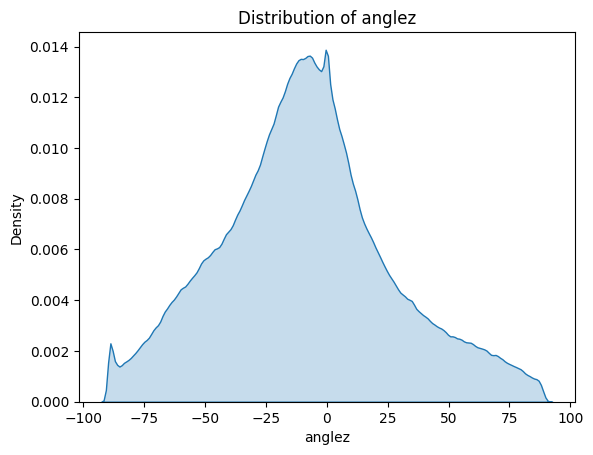

In [16]:
sns.kdeplot(measurement_df['anglez'], fill=True)

plt.xlabel('anglez')
plt.ylabel('Density')

plt.title('Distribution of anglez')

plt.show()

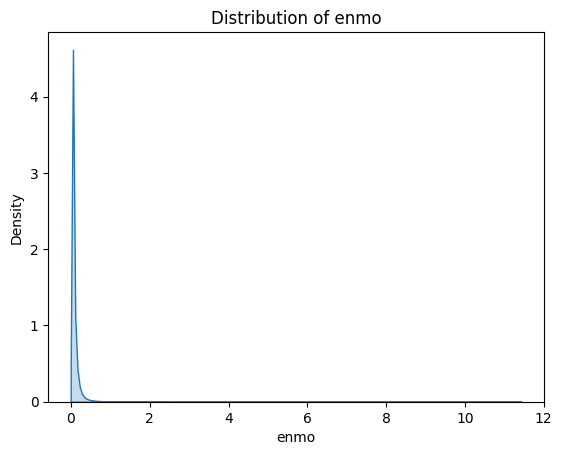

In [ ]:
sns.kdeplot(measurement_df['enmo'], fill=True)

plt.xlabel('enmo')
plt.ylabel('Density')

plt.title('Distribution of enmo')

plt.show()

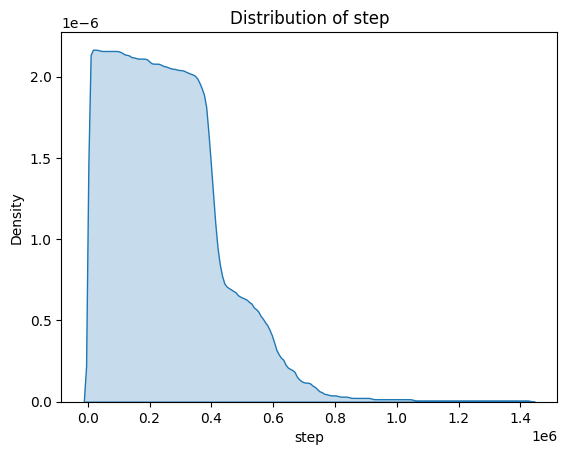

In [ ]:
sns.kdeplot(measurement_df['step'], fill=True)

plt.xlabel('step')
plt.ylabel('Density')

plt.title('Distribution of step')

plt.show()

## Analyse the events data

### First rows of the data

In [ ]:
events_df.head()

### Check data types

In [ ]:
events_df.dtypes

### Check basic statistics for numeric columns

In [ ]:
events_df.describe()

### Check for null values in data

In [ ]:
events_df.isnull().sum()

Found records with null values in the step and timestamp column. Records with null values need to be removed in the data cleaning or the cells need to be filled with data.

### Check for duplicates

In [ ]:
len(events_df[events_df.duplicated()])

In [ ]:
plt.figure(figsize=(10, 5))

events_onset = events_df[events_df['event'] == 'onset']
events_wakeup = events_df[events_df['event'] == 'wakeup']

sns.histplot(events_onset['hour'].dropna(), kde=False, bins=24, label='Onset', discrete=True)
sns.histplot(events_wakeup['hour'].dropna(), kde=False, bins=24, label='Wakeup', discrete=True)

plt.xlabel('Hour of Event')
plt.ylabel('Frequency')
plt.title('Distribution of Hour of Onset and Wakeup')
plt.legend()

plt.show()

No duplicate records found. As a result no further actions needs to be taken.

## Analyse the merging possibility of the data

In [ ]:
measurement_series_ids = measurement_df['series_id'].unique()
event_series_ids = events_df['series_id'].unique()

In [ ]:
outer_section = np.setxor1d(measurement_series_ids, event_series_ids)
outer_section

All series_id's exist in both dataframes. As a result no problems should be expected when merging the dataframes.

# Datacleaning

## Clean Events Dataframe

In [4]:
# get all events with nan values
events_with_nan_values = events_df[events_df.isnull().any(axis=1)]

for series_night_to_remove in events_with_nan_values.iterrows():
    # extract series_id and night
    series_id_to_remove = series_night_to_remove[1]['series_id']
    night_to_remove = series_night_to_remove[1]['night']
    
    # remove the entire data from the series & night combination
    events_df = events_df= events_df.drop(events_df[(events_df['series_id'] == series_id_to_remove) & (events_df['night'] == night_to_remove)].index)


# TODO remove the entire data from the measurement data from the series & night combination

In [59]:
# remove localization
events_df['timestamp'] = events_df['timestamp'].str[:-5]

# split hour, minute and seconds
events_df['hour'] = pd.to_numeric(events_df['timestamp'].str[-8:-6])
events_df['minute'] = pd.to_numeric(events_df['timestamp'].str[-5:-3])
events_df['seconds'] = pd.to_numeric(measurement_df['timestamp'].str[-2:])

# split date into seperate columns
events_df['day'] = pd.to_numeric(events_df['timestamp'].str[-11:-9])
events_df['month'] = pd.to_numeric(events_df['timestamp'].str[-14:-12])
events_df['year'] = pd.to_numeric(events_df['timestamp'].str[-20:-15])

# calculate the minutes from midnight
events_df['seconds_from_midnight'] = events_df['hour'] * 3600 + events_df['minute'] * 60 + events_df['seconds']

# remove timestamp
events_df = events_df.drop('timestamp', axis=1)

In [5]:
# change / ensure datatype
events_df["step"]  = events_df["step"].astype("int")

In [6]:
# init new awake column
events_df["awake"] = events_df["event"].replace({"onset":1,"wakeup":0})

In [7]:
events_df.head()

,series_id,night,event,step,timestamp,awake
0,038441c925bb,1,onset,4992,2018-08-14T22:26:00-0400,1
1,038441c925bb,1,wakeup,10932,2018-08-15T06:41:00-0400,0
2,038441c925bb,2,onset,20244,2018-08-15T19:37:00-0400,1
3,038441c925bb,2,wakeup,27492,2018-08-16T05:41:00-0400,0
4,038441c925bb,3,onset,39996,2018-08-16T23:03:00-0400,1


## Clean Measurment Dataframe

In [63]:
# remove localization
measurement_df['timestamp'] = measurement_df['timestamp'].str[:-5]

# split hour, minute and seconds
measurement_df['hour'] = pd.to_numeric(measurement_df['timestamp'].str[-8:-6])
measurement_df['minute'] = pd.to_numeric(measurement_df['timestamp'].str[-5:-3])
measurement_df['seconds'] = pd.to_numeric(measurement_df['timestamp'].str[-2:])


# split date into seperate columns
measurement_df['day'] = pd.to_numeric(measurement_df['timestamp'].str[-11:-9])
measurement_df['month'] = pd.to_numeric(measurement_df['timestamp'].str[-14:-12])
measurement_df['year'] = pd.to_numeric(measurement_df['timestamp'].str[-20:-15])

# calculate the minutes from midnight
measurement_df['seconds_from_midnight'] = measurement_df['hour'] * 3600 + measurement_df['minute'] * 60 + measurement_df['seconds']

# remove timestamp
measurement_df = measurement_df.drop('timestamp', axis=1)

measurement_df

,series_id,step,anglez,enmo,hour,minute,seconds,day,month,year,seconds_from_midnight
0,038441c925bb,0,2.636700,0.0217,15,30,0,14,8,2018,55800
1,038441c925bb,1,2.636800,0.0215,15,30,5,14,8,2018,55805
2,038441c925bb,2,2.637000,0.0216,15,30,10,14,8,2018,55810
3,038441c925bb,3,2.636800,0.0213,15,30,15,14,8,2018,55815
4,038441c925bb,4,2.636800,0.0215,15,30,20,14,8,2018,55820
...,...,...,...,...,...,...,...,...,...,...,...
127946335,fe90110788d2,592375,-27.277500,0.0204,0,14,35,8,9,2017,875
127946336,fe90110788d2,592376,-27.032499,0.0233,0,14,40,8,9,2017,880
127946337,fe90110788d2,592377,-26.841200,0.0202,0,14,45,8,9,2017,885
127946338,fe90110788d2,592378,-26.723900,0.0199,0,14,50,8,9,2017,890


In [8]:
# change / ensure datatype
measurement_df["step"]  = measurement_df["step"].astype("int")

In [9]:
measurement_df.sort_values(by=['series_id', 'step'], ascending=True, inplace=True)

In [20]:
# merge the two dataframes based on the series_id and step together
train = pd.merge(measurement_df, events_df[['series_id', 'step','awake']], on=['series_id', 'step'], how='left')

# del measurement_df
# del events_df

In [21]:
train['series_temp'] = train['series_id']

In [22]:
# group the data by series. prestep for feature engineering. feature engineering not across series
grouped = train.groupby('series_id')

# fill the awake column with the next value following
grouped = grouped.bfill()

# last event of series is always wakeup. as a result fill with awake 1
grouped = grouped.fillna(1)

# flatten the series grouping and reset the column name
train = grouped.reset_index()
train.drop('index', axis='columns')
train = train.rename(columns={'series_temp': 'series_id'})

In [55]:
train.sort_values(by=['series_id', 'step'], ascending=True, inplace=True)
train

In [56]:
train['change'] = train['awake'] - train['awake'].shift(1)   # Change = 1 -> onset, Change = -1 -> wakeup

train['onset'] = 0
train['wakeup'] = 0

train.loc[train['change'] == 1, 'onset'] = 1
train.loc[train['change'] == -1, 'wakeup'] = 1

del train['change']

train

,series_id,step,anglez,enmo,hour,minute,seconds,day,month,year,seconds_from_midnight,awake,onset,wakeup
0,0,0,2.636700,0.0217,15,30,0,14,8,2018,55800,1.0,0,0
1,1,1,2.636800,0.0215,15,30,5,14,8,2018,55805,1.0,0,0
2,2,2,2.637000,0.0216,15,30,10,14,8,2018,55810,1.0,0,0
3,3,3,2.636800,0.0213,15,30,15,14,8,2018,55815,1.0,0,0
4,4,4,2.636800,0.0215,15,30,20,14,8,2018,55820,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127946335,127946335,592375,-27.277500,0.0204,0,14,35,8,9,2017,875,1.0,0,0
127946336,127946336,592376,-27.032499,0.0233,0,14,40,8,9,2017,880,1.0,0,0
127946337,127946337,592377,-26.841200,0.0202,0,14,45,8,9,2017,885,1.0,0,0
127946338,127946338,592378,-26.723900,0.0199,0,14,50,8,9,2017,890,1.0,0,0
